In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('Housing.csv')
# Виведіть перші 5 рядків
print(data.head(5))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [12]:
# Вибір стовпців для нового датасету
columns = ['price', 'area', 'bedrooms', 'bathrooms']
new_data = data[columns]

In [13]:
# Попередній аналіз даних
print(new_data.info())  # Виведення інформації про датасет
print(new_data.isnull().sum())  # Перевірка на відсутні значення

# Заміна "-" на NaN та перетворення типів даних на float
new_data = new_data.replace('-', np.nan)
new_data = new_data.astype(float)

# Заповнення відсутніх значень середніми значеннями стовпців
new_data.fillna(new_data.mean(), inplace=True)
print(new_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB
None
price        0
area         0
bedrooms     0
bathrooms    0
dtype: int64
        price    area  bedrooms  bathrooms
0  13300000.0  7420.0       4.0        2.0
1  12250000.0  8960.0       4.0        4.0
2  12250000.0  9960.0       3.0        2.0
3  12215000.0  7500.0       4.0        2.0
4  11410000.0  7420.0       4.0        1.0


In [14]:
# Нормалізація даних
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)

In [15]:
# Розділення даних на навчальний та тестовий набори
X = scaled_data[:, 1:]  # Атрибути (площа, кількість ванних кімнат, кількість спалень)
y = scaled_data[:, 0]  # Цільова змінна (ціна на будинок)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Побудова моделі лінійної регресії та її навчання
model = LinearRegression()
model.fit(X_train, y_train)

#coef
print(f"coef {model.coef_}")

#intercept
model.intercept_

coef [0.40082084 0.14213176 0.38208794]


-0.016281754425403302

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Оцінка моделі на тестових даних
y_pred = model.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared (коефіцієнт детермінації): {r2}')

# Крос-валідація
cv_scores = cross_val_score(model, X, y, cv=5)
mean_r2_with_cv = np.mean(cv_scores)
print(f'Середній R-squared після крос-валідації: {mean_r2_with_cv}\n')

if r2 > mean_r2_with_cv:
    print('Модель без крос-валідації має кращий R-squared на тестовому наборі.')
elif r2_without_cv < mean_r2_with_cv:
    print('Модель з крос-валідацією має кращий середній R-squared після крос-валідації.')
else:
    print('Результати R-squared без крос-валідації та з крос-валідацією майже ідентичні.')

RMSE: 0.8874106823867894
R-squared (коефіцієнт детермінації): 0.45592991188724485
Середній R-squared після крос-валідації: -13.989158180111716

Модель без крос-валідації має кращий R-squared на тестовому наборі.


In [18]:
# Прогнозовані ціни на будинки для тестового набору даних
predicted_prices = scaler.inverse_transform(np.concatenate([y_pred.reshape(-1, 1), X_test], axis=1))
predicted_prices = pd.DataFrame(predicted_prices, columns=['Predicted Price', 'Area', 'Bedrooms', 'Bathrooms'])

# Виведення прогнозованих цін на будинки для тестового набору даних
print(predicted_prices.head(10))

   Predicted Price    Area  Bedrooms  Bathrooms
0     6.383168e+06  5900.0       4.0        2.0
1     6.230250e+06  6500.0       3.0        2.0
2     3.597885e+06  4040.0       2.0        1.0
3     4.289731e+06  5000.0       3.0        1.0
4     3.930446e+06  3960.0       3.0        1.0
5     4.883933e+06  6720.0       3.0        1.0
6     5.505773e+06  8520.0       3.0        1.0
7     6.068793e+06  4990.0       4.0        2.0
8     3.321512e+06  3240.0       2.0        1.0
9     3.495158e+06  2700.0       3.0        1.0


In [19]:
# Додавання стовпця з одиницями до матриці ознак для врахування зсуву (intercept)
X_with_intercept = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

# Знаходження аналітичного рішення
theta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y_train

# Виведення коефіцієнтів
print('Аналітичні коефіцієнти (ваги моделі):')
print(theta)

Аналітичні коефіцієнти (ваги моделі):
[-0.01628175  0.40082084  0.14213176  0.38208794]


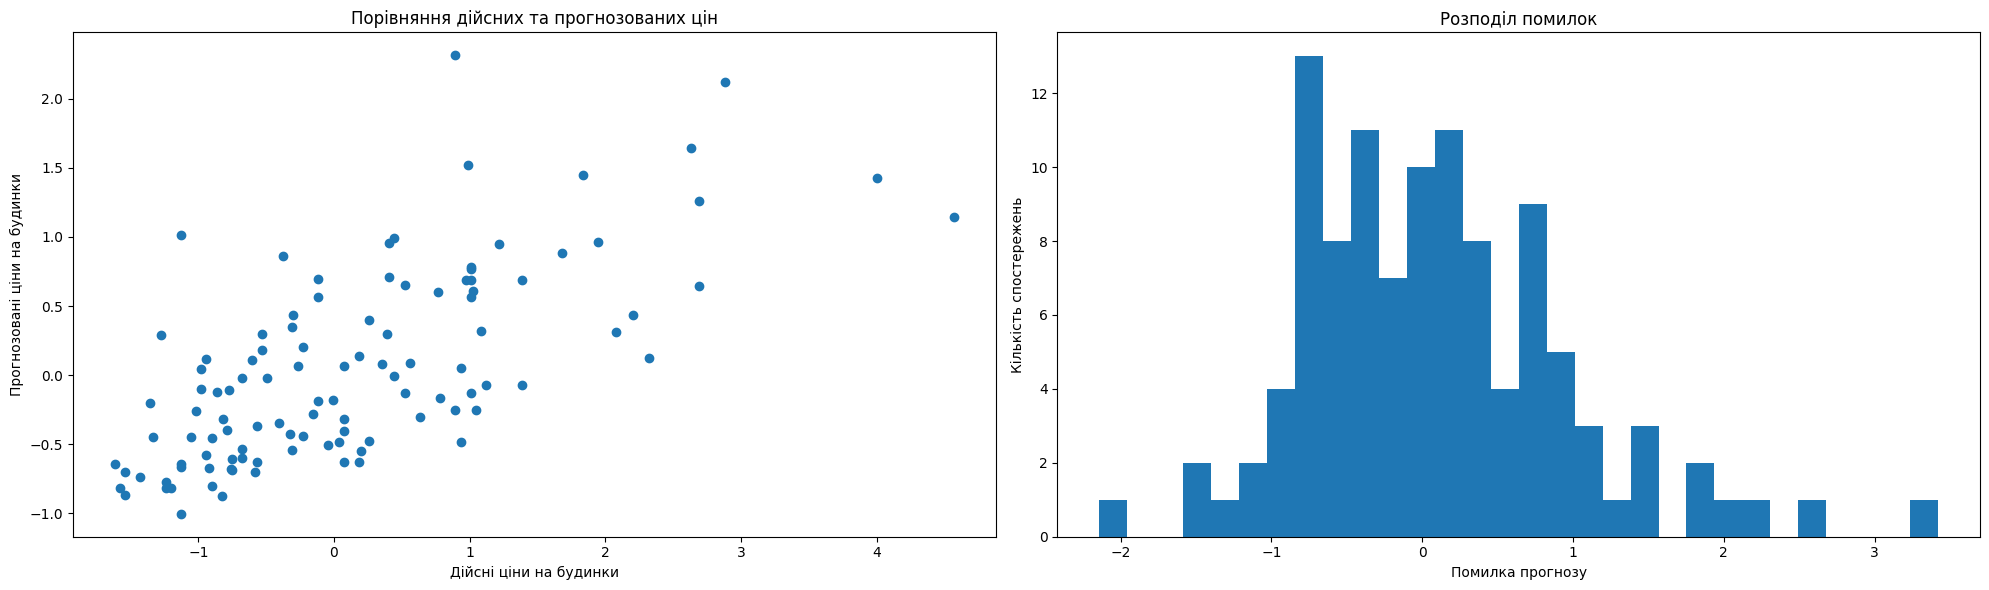

Коефіцієнти лінійної регресії (ваги моделі):
Аналітичний розв'язок: [-0.01628175  0.40082084  0.14213176  0.38208794]
Результат лінійної регресії на тестовому наборі: [0.40082084 0.14213176 0.38208794]


In [22]:
# Побудова графіків для ознайомлення з розподілом даних та регресійною моделлю
plt.figure(figsize=(20, 6))

# Графік дійсних цін на будинки та прогнозованих цін
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel("Дійсні ціни на будинки")
plt.ylabel("Прогнозовані ціни на будинки")
plt.title("Порівняння дійсних та прогнозованих цін")

# Графік розподілу помилок (решток)
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30)
plt.xlabel("Помилка прогнозу")
plt.ylabel("Кількість спостережень")
plt.title("Розподіл помилок")

plt.tight_layout()
plt.show()

# Порівняння коефіцієнтів лінійної регресії з аналітичними результатами
print('Коефіцієнти лінійної регресії (ваги моделі):')
print('Аналітичний розв\'язок:', theta)
print('Результат лінійної регресії на тестовому наборі:', model.coef_)